In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn  as sn

In [2]:

url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
#url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?ra w=true' 
fuel_data = pd.read_csv(url, error_bad_lines=False) 
#fuel_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#skewness in each row
fuel_data.skew(axis=1, skipna=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0        2.645751
1        2.645751
2        2.645749
3        2.645750
4        2.632823
           ...   
29518    2.585605
29519    2.645718
29520    2.643757
29521    2.645533
29522    2.579144
Length: 29523, dtype: float64

In [5]:
#skewness of column(not so sure)
fuel_data.skew(axis=0, skipna=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [6]:
#dataset description
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
#Create an identity matrix
np.identity(2)

array([[1., 0.],
       [0., 1.]])

In [8]:
#Find correlation of features using Pearson Correlation
pearsoncorr=fuel_data.corr(method="pearson")
pearsoncorr

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


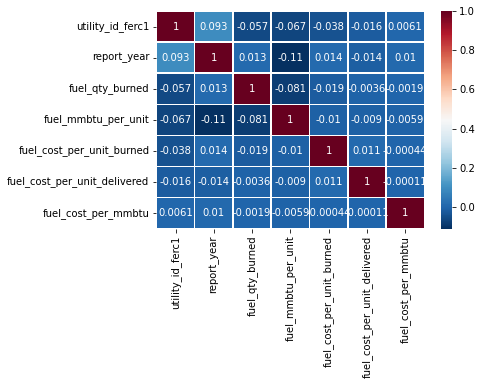

In [9]:
sn.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,yticklabels=pearsoncorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5)


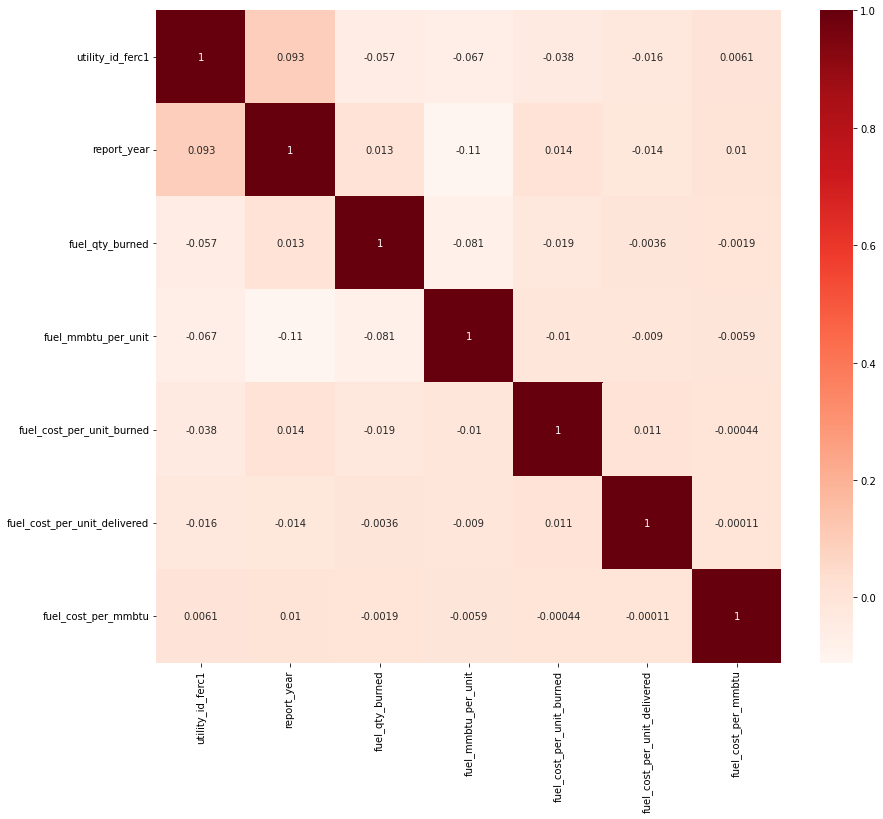

In [10]:
plt.figure(figsize=(14,12))
corr_plot = fuel_data.corr()
sn.heatmap(corr_plot, annot=True,  cmap=plt.cm.Reds)
plt.show()

In [11]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [12]:
#Which year has the highest average fuel cost per unit delivered?
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

In [13]:
#Calculate skewness 0f fuel_cost_per_unit_burned
fcpub=fuel_data['fuel_cost_per_unit_burned']
fcpub.skew()


19.787439798747734

In [14]:
#Calculate skewness 0f fuel_cost_per_unit_burned
fcpub=fuel_data['fuel_cost_per_unit_burned']
f=fcpub.skew()
round(f,2)

19.79

In [15]:
#Calculate skewness 0f fuel_cost_per_unit_burned

from scipy.stats import skew

fcpub = fuel_data['fuel_cost_per_unit_burned']
round(skew(fcpub),2)

19.79

In [16]:
#Calculate kurtosis 0f fuel_cost_per_unit_burned
fcpub=fuel_data['fuel_cost_per_unit_burned']
fcpub.kurt()

485.2558511544102

In [17]:
#Calculate kurtosis 0f fuel_cost_per_unit_burned

from scipy.stats import kurtosis
fcpub = fuel_data['fuel_cost_per_unit_burned']
round(kurtosis(fcpub),2)

485.17

In [18]:
# Number of columns with missing values by percentage
percent_missing = fuel_data.isnull().sum()*100/ len(fuel_data)
percent_missing

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [19]:
# Number of columns with missing values by percentage
percent_missing = fuel_data.isnull().sum()*100/ len(fuel_data)
percent_missing.sort_values(ascending = False)

fuel_unit                       0.609694
record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [20]:
# Number of columns with missing values by percentage

total = fuel_data.isnull().sum().sort_values(ascending=False)
percent_1 = fuel_data.isnull().sum()/fuel_data.isnull().count()*100
percent_2 = (round(percent_1, 4)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
fuel_unit,180,0.6097
record_id,0,0.0000
utility_id_ferc1,0,0.0000
report_year,0,0.0000
plant_name_ferc1,0,0.0000


In [21]:
#Which of the following fuel type code has the lowest average fuel cost per unit burned?
fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean().sort_values(ascending=True)

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [22]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [23]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A.append(B)
A

[1, 2, 3, 4, 5, 6, [13, 21, 34]]